# Logistic Regression

Classification model to identify weather a passenger has survived or not

# Importing modules and Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv("./titanic/train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data  Wrangling

In [4]:
#total number of nan value in dataset
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#percentage of nan values 
print("Precentage of NaN in Age",((df["Age"].isna().sum()/df.shape[0])*100))
print("Precentage of NaN in Cabin",((df["Cabin"].isna().sum()/df.shape[0])*100))
print("Precentage of NaN in Embarked",((df["Embarked"].isna().sum()/df.shape[0])*100))

Precentage of NaN in Age 19.865319865319865
Precentage of NaN in Cabin 77.10437710437711
Precentage of NaN in Embarked 0.22446689113355783


(-10, 90)

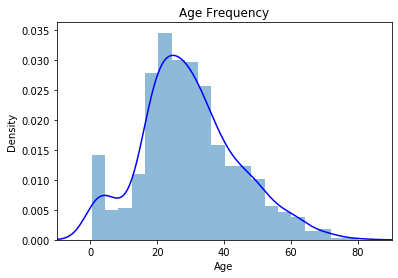

In [6]:
#plot of age for finding the frequency of age groups
df["Age"].plot(kind='hist',bins=20,density=True,stacked=True,alpha=0.5)
df["Age"].plot(kind='density',color='b')
plt.title("Age Frequency")
plt.xlabel("Age")
plt.xlim(-10,90)

In [7]:
print("Median of Age is",df["Age"].median(skipna=True))
print("Mean of Age is",df["Age"].mean(skipna=True))

Median of Age is 28.0
Mean of Age is 29.69911764705882


In [8]:
#replacing the missing value with mean
df["Age"].replace(np.nan,df["Age"].mean(skipna=True),inplace=True)

(-10, 90)

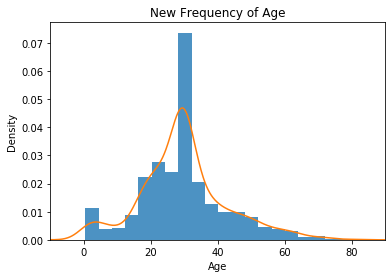

In [9]:
df["Age"].plot(kind="hist",density=True,stacked=True,bins=20,alpha=0.8)
df["Age"].plot(kind="density")
plt.title("New Frequency of Age")
plt.xlabel("Age")
plt.xlim(-10,90)

In [10]:
#as percentsge of miising value of cabin is 77 % so it is better to drop this column 
df.drop('Cabin',axis=1,inplace=True)

In [11]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Embarked Frequency')

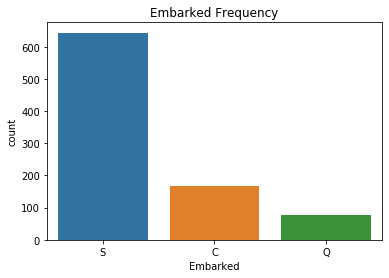

In [13]:
#plot of Embarked to find the highest frequency
sns.countplot("Embarked",data=df)
plt.title("Embarked Frequency")

In [14]:
#replacing the missing value with S
df["Embarked"].replace(np.nan,"S",inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Data Analysis and Data Visualization

## 1. Pclass

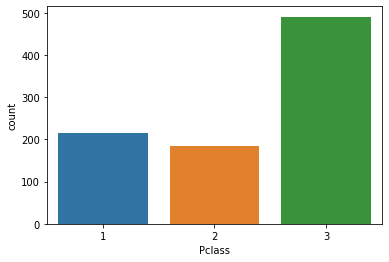

In [18]:
sns.countplot(df.Pclass)

the graph indicates that there were more passengers with 3 Pclass

Text(0.5, 1.0, 'Pclass vs Survived')

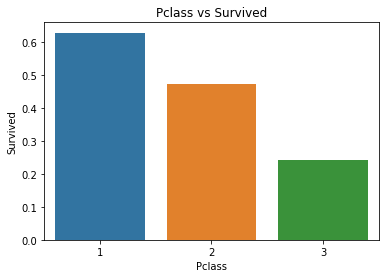

In [19]:
#plot to find the relationship between Pclass and Survived
sns.barplot(x="Pclass",y="Survived",data=df,ci=None)
plt.title("Pclass vs Survived")

this barplot shows passengers with 1 Pclass (Passenger class) survived the most regard less of their quanity which was less number as compair to passenger with Pclass equal to 3

## 2. Sex

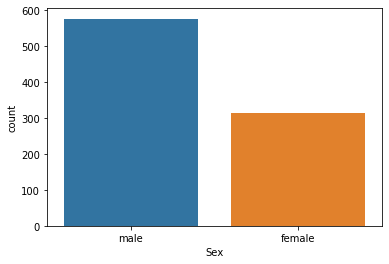

In [20]:
sns.countplot(df.Sex)

the graph shows that there were more male passenger as compaired to femail

Text(0.5, 1.0, 'sex vs Survived')

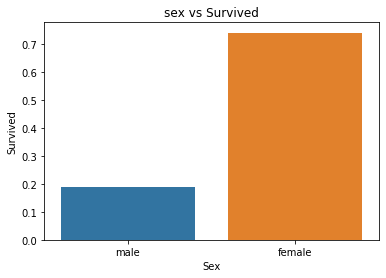

In [21]:
#plot to find the relationship between Sex and Survived
sns.barplot(x="Sex",y="Survived",data=df,ci=None)
plt.title("sex vs Survived")

plot shows that femail which were less in quantity as compair to male pessenger survived more then male

## 3. Age

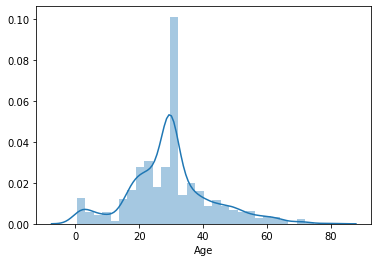

In [22]:
sns.distplot(df.Age)

Text(0.5, 1.0, 'Plot of Age for Survival and Death')

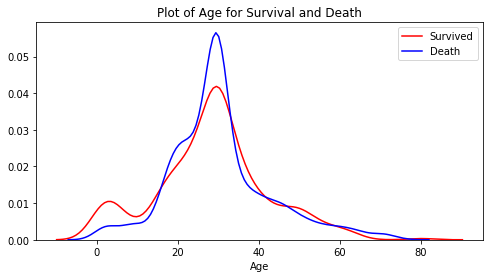

In [23]:
plt.figure(figsize=(8,4))
ax1=sns.distplot(df['Age'][df.Survived==1],hist=False,label="Survived",color='r')
sns.distplot(df["Age"][df.Survived==0],hist=False,label='Death',color='b',ax=ax1)
plt.title("Plot of Age for Survival and Death")

In [24]:
#grouping the age in different category

In [25]:
bins=np.linspace(df["Age"].min(),df["Age"].max(),5)
bins

array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])

In [26]:
age_group=['Children','Adult','Middle_age','Old']

In [27]:
df["Age_level"]=pd.cut(df["Age"],bins,labels=age_group,include_lowest=True)
df["Age_level"].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age_level, dtype: category
Categories (4, object): [Children < Adult < Middle_age < Old]

Text(0.5, 1.0, 'Age_level vs Survived')

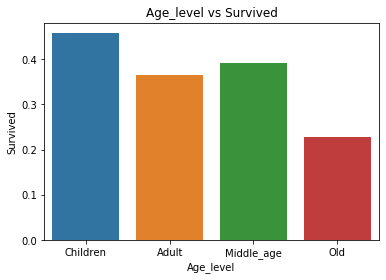

In [28]:
#plot to find the relationship between age and Survived
sns.barplot(x="Age_level",y="Survived",data=df,ci=None)
plt.title("Age_level vs Survived")

plot shows that clildrens survived the most

## 4. Sibsp and Parch

In [29]:
#sibsp is number of siblings
#parch is no parents

In [30]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
#creating column of peopls who are alone on the ship
df['Singles']=np.where((df["SibSp"]+df["Parch"])>0,0,1)

Text(0.5, 1.0, 'Singles vs Survived')

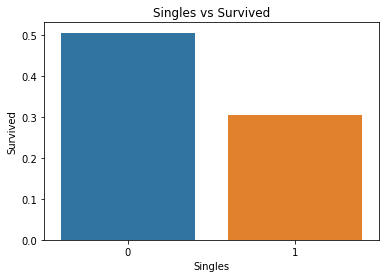

In [33]:
#plot to find the relationship between singles and Survived
sns.barplot(x='Singles',y='Survived',data=df,ci=None)
plt.title("Singles vs Survived")

plot shows that people with family survived the most

In [34]:
df.drop(df[['SibSp','Parch']],axis=1,inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Age_level,Singles
0,1,0,3,male,22.0,7.2500,S,Adult,0
1,2,1,1,female,38.0,71.2833,C,Adult,0
2,3,1,3,female,26.0,7.9250,S,Adult,1
3,4,1,1,female,35.0,53.1000,S,Adult,0
4,5,0,3,male,35.0,8.0500,S,Adult,1


## 5. Embarked

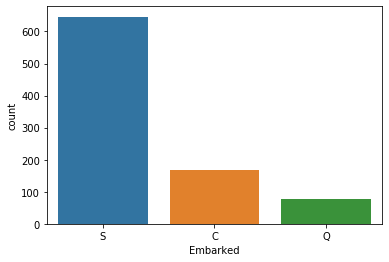

In [36]:
sns.countplot(df.Embarked)

graph shows that most of the people have borded the ship at Embarked S

Text(0.5, 1.0, 'Embarked vs Survived')

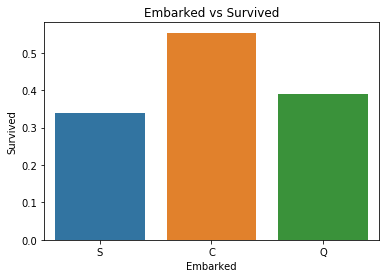

In [37]:
#plot to find the relationship between Embarked and Survived
sns.barplot(x="Embarked",y="Survived",data=df,ci=None)
plt.title("Embarked vs Survived")

plot shows that people who borded the ship at c Embarked survived the most where people borded the ship at Q Embarked survived after that and least people who borded ship from s survived.

## 6. Fare

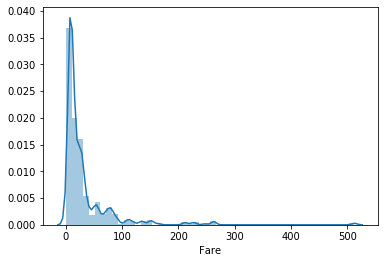

In [38]:
sns.distplot(df.Fare)

Text(0.5, 1.0, 'Plot of Fare for Survival and Death')

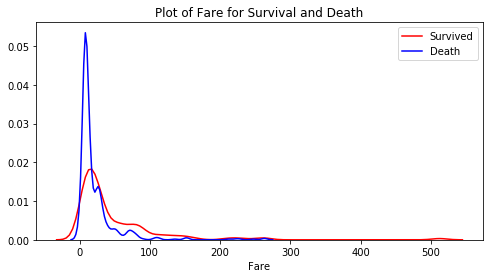

In [39]:
#plot shows that people who board the ship at lower fare survived the least
plt.figure(figsize=(8,4))
ax1=sns.distplot(df['Fare'][df.Survived==1],hist=False,label="Survived",color='r')
sns.distplot(df["Fare"][df.Survived==0],hist=False,label='Death',color='b',ax=ax1)
plt.title("Plot of Fare for Survival and Death")

# Data Featuring

## Applying Dummey variable

In [40]:
df=pd.concat([df,pd.get_dummies(df['Sex'],drop_first=True)],axis=1)
df.drop('Sex',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Age_level,Singles,male
0,1,0,3,22.0,7.2500,S,Adult,0,1
1,2,1,1,38.0,71.2833,C,Adult,0,0
2,3,1,3,26.0,7.9250,S,Adult,1,0
3,4,1,1,35.0,53.1000,S,Adult,0,0
4,5,0,3,35.0,8.0500,S,Adult,1,1


In [41]:
df=pd.concat([df,pd.get_dummies(df['Embarked'],drop_first=True)],axis=1)
df.drop('Embarked',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Age_level,Singles,male,Q,S
0,1,0,3,22.0,7.2500,Adult,0,1,0,1
1,2,1,1,38.0,71.2833,Adult,0,0,0,0
2,3,1,3,26.0,7.9250,Adult,1,0,0,1
3,4,1,1,35.0,53.1000,Adult,0,0,0,1
4,5,0,3,35.0,8.0500,Adult,1,1,0,1


## MinMaxScaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [44]:
scaled_df=scaler.fit_transform(df[['Age','Fare']])
scaled_df=pd.DataFrame(scaled_df,columns=['Age','Fare'])
scaled_df.tail()

,Age,Fare
886,0.334004,0.025374
887,0.233476,0.058556
888,0.367921,0.045771
889,0.321438,0.058556
890,0.396833,0.015127


In [45]:
df.drop(['Age','Fare'],axis=1,inplace=True)

In [46]:
df[['Age','Fare']]=scaled_df
df.tail()

,PassengerId,Survived,Pclass,Age_level,Singles,male,Q,S,Age,Fare
886,887,0,2,Adult,1,1,0,1,0.334004,0.025374
887,888,1,1,Children,1,0,0,1,0.233476,0.058556
888,889,0,3,Adult,0,0,0,1,0.367921,0.045771
889,890,1,1,Adult,1,1,0,0,0.321438,0.058556
890,891,0,3,Adult,1,1,1,0,0.396833,0.015127


# Model Development

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
X=df[['Pclass','Age','Singles','male','Q','S','Fare']]
Y=df['Survived']

In [49]:
lm=LogisticRegression()

In [50]:
lm.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
yhat=lm.predict(X)

In [52]:
lm.score(X,Y)

0.7912457912457912

In [53]:
confusion_matrix(Y,yhat)

array([[462,  87],
       [ 99, 243]], dtype=int64)

In [54]:
model=SVC()

In [55]:
model.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
model_yhat=model.predict(X)

In [57]:
model.score(X,Y)

0.8114478114478114

In [58]:
rfe=RFE(lm,5)
rfe=rfe.fit(X,Y)
X.columns[rfe.support_]

Index(['Pclass', 'Age', 'male', 'S', 'Fare'], dtype='object')

In [59]:
x=df[['Pclass', 'Age', 'male', 'S', 'Fare']]
y=df.Survived

In [60]:
lm.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lm.score(x,y)

0.7912457912457912

In [62]:
confusion_matrix(Y,yhat)

array([[462,  87],
       [ 99, 243]], dtype=int64)

In [63]:
model.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
model.score(x,y)

0.8114478114478114

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
score=cross_val_score(lm,x,y)
score.mean()

0.7878852551628899

In [67]:
test_df=pd.read_csv('./titanic/test.csv')
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [69]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [70]:
#replacing the missing value with mean
test_df["Age"].replace(np.nan,test_df["Age"].mean(skipna=True),inplace=True)

In [71]:
#replacing the missing value with mean
test_df["Fare"].replace(np.nan,test_df["Fare"].mean(skipna=True),inplace=True)

In [72]:
#creating column of peopls who are alone on the ship
test_df['Singles']=np.where((test_df["SibSp"]+test_df["Parch"])>0,0,1)

In [73]:
test_df.drop(test_df[['SibSp','Parch']],axis=1,inplace=True)

In [74]:
test_df=pd.concat([test_df,pd.get_dummies(test_df['Sex'],drop_first=True)],axis=1)
test_df.drop('Sex',axis=1,inplace=True)

In [75]:
test_df=pd.concat([test_df,pd.get_dummies(test_df['Embarked'],drop_first=True)],axis=1)
test_df.drop('Embarked',axis=1,inplace=True)

In [76]:
scaled_df_test=scaler.fit_transform(test_df[['Age','Fare']])
scaled_df_test=pd.DataFrame(scaled_df_test,columns=['Age','Fare'])
scaled_df_test.tail()

,Age,Fare
413,0.396975,0.015713
414,0.512066,0.212559
415,0.505473,0.014151
416,0.396975,0.015713
417,0.396975,0.043640


In [77]:
test_df.drop(['Age','Fare'],axis=1,inplace=True)

In [78]:
test_df[['Age','Fare']]=scaled_df_test
test_df.tail()

,PassengerId,Pclass,Singles,male,Q,S,Age,Fare
413,1305,3,1,1,0,1,0.396975,0.015713
414,1306,1,1,0,0,0,0.512066,0.212559
415,1307,3,1,1,0,1,0.505473,0.014151
416,1308,3,1,1,0,1,0.396975,0.015713
417,1309,3,0,1,0,0,0.396975,0.043640


In [81]:
x_test=test_df[['Pclass', 'Age', 'male', 'S', 'Fare']]

In [82]:
yhat_test=model.predict(x_test)
yhat_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [83]:
test_df['Survived']=pd.Series(yhat_test)

In [84]:
test_df.tail()

,PassengerId,Pclass,Singles,male,Q,S,Age,Fare,Survived
413,1305,3,1,1,0,1,0.396975,0.015713,0
414,1306,1,1,0,0,0,0.512066,0.212559,1
415,1307,3,1,1,0,1,0.505473,0.014151,0
416,1308,3,1,1,0,1,0.396975,0.015713,0
417,1309,3,0,1,0,0,0.396975,0.043640,0


In [85]:
submission_df=test_df[['PassengerId','Survived']]
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [86]:
submission_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [87]:
submission_df.to_csv('answer.csv',index=False,header=True)